# **<center>PROJET D'ANALYSE DES VENTES DE L'ENTREPRISE RETAIL</center>**

###  **Rappel du context**
   l'entreprise "Retail" souhaite optimiser son approvisionnement en produit en optimisant les historiques de vente.

###  **Objectif**
   Analyser un jeu de donnees de ventes pour identifier des tendances et proposer des strategies d'approvisionnement efficaces.

### **Importation des libraries**

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Preparation et Exploitation des donnees**

### **Importation des donnees**

   il s'agit d'un jeu de donnees provenant de http://archive.ics.uci.edu/dataset/352/online+retail contenant des transaction et des annulations effectuees par un detaillant en ligne

In [2]:
df = pd.read_excel("retail.xlsx")

In [3]:
#lecture des 5 premieres lignes
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#lecture des 5 dernieres colones
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#taille du dataset
df.shape

(541909, 8)

In [6]:
#colonnes
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#vue globale des donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**note** : le type de chaque colonne est correct a l'exception de CustomerID

In [8]:
# mondifions le type de CustomerID   
df['CustomerID'] = df['CustomerID'].astype(object)

In [9]:
#statistiques sommaire des donnees
df[['Quantity', 'UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


**note** : nous pouvons observer que les colonnes Quantity et UnitPrice ont des valeurs negatives qui n'ont pas de sens

**Supprimons les colonnes qui ont des valeurs negatives**

In [10]:
# Analyse des proportions
len(df[df['Quantity'] <= 0])/len(df) * 100

1.9604767590130447

In [11]:
# Analyse des proportions
len(df[df['UnitPrice'] <= 0])/len(df) * 100

0.46446912673530055

In [12]:
df = df[df['Quantity'] >= 0]

In [13]:
df = df[df['UnitPrice'] >= 0]

### **Analyse et Traitement des valeurs manquantes**

In [14]:
# calculons le pourcentage de valeurs manquantes par colonne
df.isna().sum()/len(df) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.111428
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.101311
Country         0.000000
dtype: float64

**note** : nous voyons qu'il y a pres de 25% de valeurs manquantes dans la colonne CustomerID et moins de 1% dans la colonne Description

In [15]:
# remplacons les valeurs manquante de la colonne description par : pas de description
df['Description'].fillna("pas de description", inplace = True)

In [16]:
# verification
df['Description'].isna().sum()/len(df) * 100

0.0

**IMPORTANT** : vu que l'objectif est d'analyser les vente des produits j'ai pris la decision de ne pas supprimer les lignes de notre dataset contenant un vide au niveau du CustomerID car cette action devait reduire de 25% la quantite globale de mes produits 

### **Analyse et Traitement des doublons**

In [17]:
# pourcentage de doublons
df.duplicated().sum()/len(df) * 100

0.9845976626393089

In [18]:
# suppression des doublons
df.drop_duplicates(inplace = True)

In [19]:
# verification
df.duplicated().sum()

0

## **2. Analyse exploratoire des donnees**

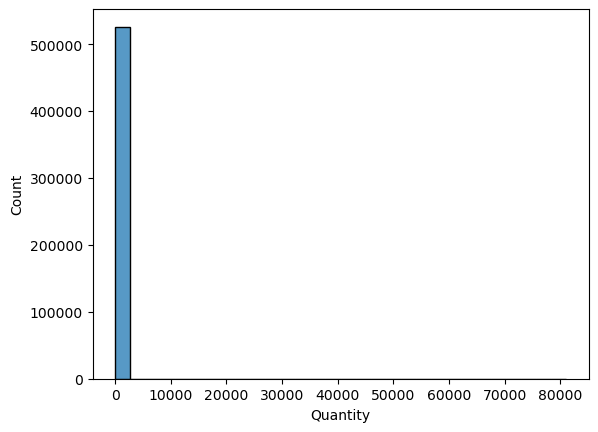

In [20]:
sns.histplot(x = df['Quantity'], palette = "cool", bins = 30);

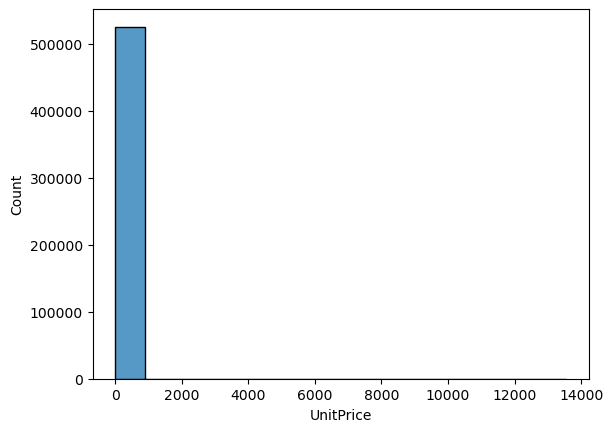

In [21]:
sns.histplot(x = df['UnitPrice'], palette = "cool", bins = 15);

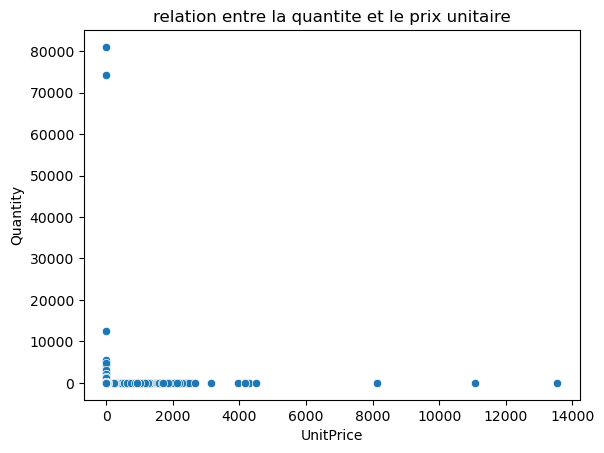

In [22]:
plt.title("relation entre la quantite et le prix unitaire")
sns.scatterplot(x = "UnitPrice", y = "Quantity", data = df , palette = "cool");

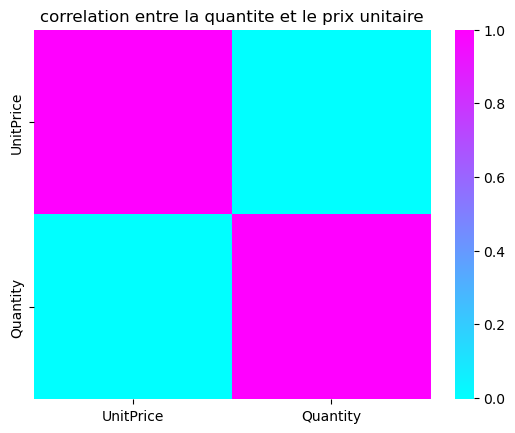

In [23]:
plt.title("correlation entre la quantite et le prix unitaire")
sns.heatmap(df[['UnitPrice',"Quantity"]].corr(), cmap = "cool" );